## Esercitazione 7 -  9 Aprile 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x=np.arange(-4.0,4.0,0.1)
y=np.arange(-4.0,4.0,0.1)
X,Y=np.meshgrid(x,y)
Z1=2*X-np.cos(Y)
Z2=np.sin(X)+2*Y

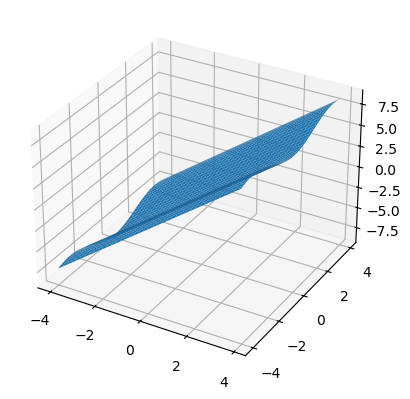

In [3]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1)
plt.show()

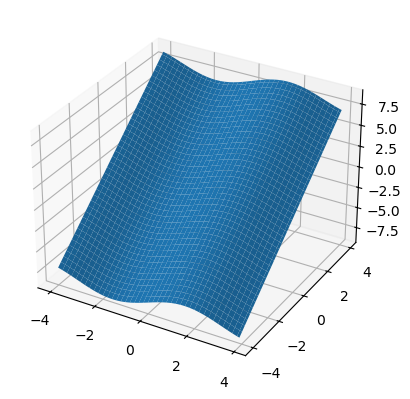

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z2)
plt.show()

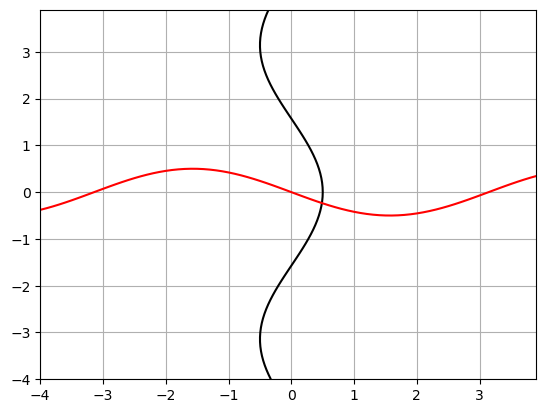

In [5]:
plt.contour(X,Y,Z1,levels=0,colors='black')
plt.contour(X,Y,Z2,levels=0,colors='red')
plt.grid(True)
plt.show()

In [6]:
def newton(fun,jac,x0,tolx,tolf,nmax):
    matjac=jac(x0)
    
    if np.linalg.det(matjac)==0:
        print('jacobiano iniziale è nullo!')
        return None

    it=1
    s=-np.linalg.solve(matjac,fun(x0))
    x1=x0+s
    fx1=fun(x1)
    Xm=[np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    
    while it <= nmax and np.linalg.norm(fx1,1) >= tolf and np.linalg.norm(s,1) >= tolx*np.linalg.norm(x1,1):
        x0=x1
        matjac=jac(x0)

        if np.linalg.det(matjac)==0:
            print('jacobiano iniziale è nullo!')
            return None

        it+=1
        s=-np.linalg.solve(matjac,fun(x0))
        x1=x0+s
        fx1=fun(x1)
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))

    return x1,it,Xm

In [7]:
F=lambda x: np.array([2*x[0]-np.cos(x[1]),np.sin(x[0])+2*x[1]])
Jac=lambda x: np.array([[2,np.sin(x[1])],[np.cos(x[0]),2]])
x0=np.array([-1,1])
tolx=1e-10
tolf=1e-10
nmax=100
zeroN,itN,XmN=newton(F,Jac,x0,tolx,tolf,nmax)

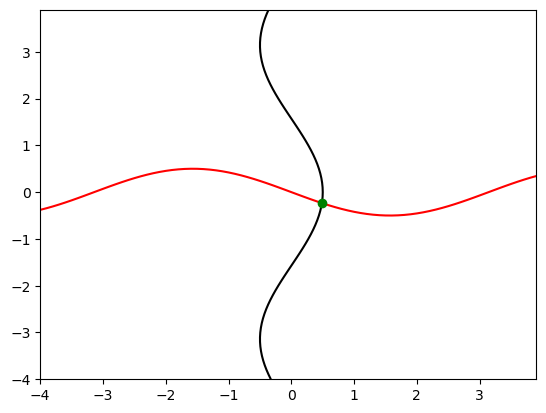

In [8]:
plt.contour(X,Y,Z1,levels=0,colors='black')
plt.contour(X,Y,Z2,levels=0,colors='red')
plt.plot(zeroN[0],zeroN[1],'go')
plt.show()

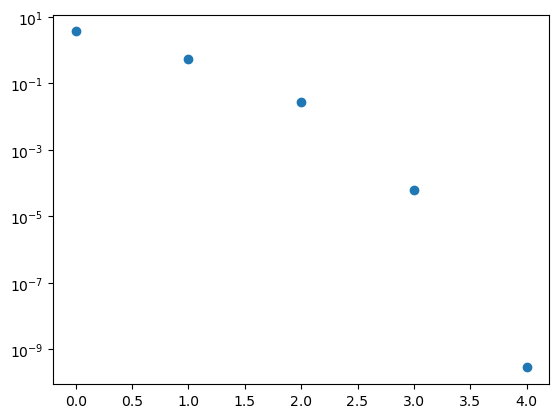

In [9]:
plt.semilogy(range(itN),XmN,'o')
plt.show()

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg